In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import sys
sys.path.append('../../src')

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import torch
from torch.utils.data import DataLoader

from data.scannet.flow import ScanNetFlow
from flow_regressors.regressors import (
    DensePoseRegressorV1, DensePoseRegressorV2, DensePoseRegressorV3, DensePoseRegressorV4, DensePoseRegressorV5,
    DensePoseRegressorV6, DensePoseRegressorV7, DensePoseRegressorV8, DensePoseRegressorV9)

from training.train_flow import test
from training.train_flow_v1 import test as test_v1
from utils.model import load_checkpoint
from utils.metrics import mAA, rotation_angle_distance_batch, vector_angle_distance_batch, mAA_max, mAA_sep

import numpy as np
from numpy.linalg import norm

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import pandas as pd 

from tqdm.auto import tqdm
import pickle
from pathlib import Path

In [5]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

### 0. Data

In [6]:
test_data = ScanNetFlow(
    root_dir='/home/project/ScanNet/scannet_test_1500/',
    npz_path='/home/project/ScanNet/test.npz',
    intrinsics_path='/home/project/ScanNet/intrinsics_test.npz',
    mode='test',
    reduce=True
)

test_loader = DataLoader(test_data, batch_size=4, shuffle=False, drop_last=False, pin_memory=True, num_workers=0)

## 1. Metrics

In [9]:
metrics = {}

if Path('/home/project/code/results/scannet/metrics_flow').is_file():
    with open('/home/project/code/results/scannet/metrics_flow', 'rb') as f:
        metrics = pickle.load(f)

### 1.1 Exp_1

In [ ]:
checkpoint = load_checkpoint('/home/project/code/src/weights/FLOW_TO_POSE_EXP_1_9.pth', device)
model = DensePoseRegressorV1()
model.load_state_dict(checkpoint['model'])
model.to(device);

In [ ]:
results = test(model, test_loader, device)

In [ ]:
name = "exp_1"
metrics[name] = {
    'R_angle_distances': rotation_angle_distance_batch(results['R_gt'], results['R']),
    't_angle_distances': vector_angle_distance_batch(results['t_gt'], results['t']),
    't_distances_l2': norm(results['t_gt'] - results['t'], ord=2, axis=1),
    'R_gt_distances': rotation_angle_distance_batch(results['R_gt'], np.tile(np.eye(3, 3), (results['R_gt'].shape[0], 1, 1))),
    't_gt_distances': norm(results['t_gt'], ord=2, axis=1)
}

In [18]:
name = "exp_1"
print(f'{"mAA 5 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(5, 0.2), N=10000):.4f}')
print(f'{"mAA 10 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(10, 0.5), N=10000):.4f}')
print(f'{"mAA 20 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(20, 1), N=10000):.4f}')

mAA 5 rotation       0.1819
mAA 10 rotation      0.3975
mAA 20 rotation      0.5946


### 1.2 Exp_2

In [ ]:
checkpoint = load_checkpoint('/home/project/code/src/weights/FLOW_TO_POSE_EXP_2_9.pth', device)
model = DensePoseRegressorV1([0., 0., 0.])
model.load_state_dict(checkpoint['model'])
model.to(device);

In [ ]:
results = test(model, test_loader, device)

In [ ]:
name = "exp_2"
metrics[name] = {
    'R_angle_distances': rotation_angle_distance_batch(results['R_gt'], results['R']),
    't_angle_distances': vector_angle_distance_batch(results['t_gt'], results['t']),
    't_distances_l2': norm(results['t_gt'] - results['t'], ord=2, axis=1),
    'R_gt_distances': rotation_angle_distance_batch(results['R_gt'], np.tile(np.eye(3, 3), (results['R_gt'].shape[0], 1, 1))),
    't_gt_distances': norm(results['t_gt'], ord=2, axis=1)
}

In [19]:
name = "exp_2"
print(f'{"mAA 5 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(5, 0.2), N=10000):.4f}')
print(f'{"mAA 10 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(10, 0.5), N=10000):.4f}')
print(f'{"mAA 20 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(20, 1), N=10000):.4f}')

mAA 5 rotation       0.1903
mAA 10 rotation      0.4044
mAA 20 rotation      0.6050


### 1.3Exp_3

In [11]:
checkpoint = load_checkpoint('/home/project/code/src/weights/FLOW_TO_POSE_EXP_3_9.pth', device)
model = DensePoseRegressorV2()
model.load_state_dict(checkpoint['model'])
model.to(device);

In [ ]:
results = test(model, test_loader, device)

In [ ]:
name = "exp_3"
metrics[name] = {
    'R_angle_distances': rotation_angle_distance_batch(results['R_gt'], results['R']),
    't_angle_distances': vector_angle_distance_batch(results['t_gt'], results['t']),
    't_distances_l2': norm(results['t_gt'] - results['t'], ord=2, axis=1),
    'R_gt_distances': rotation_angle_distance_batch(results['R_gt'], np.tile(np.eye(3, 3), (results['R_gt'].shape[0], 1, 1))),
    't_gt_distances': norm(results['t_gt'], ord=2, axis=1)
}

In [20]:
name = "exp_3"
print(f'{"mAA 5 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(5, 0.2), N=10000):.4f}')
print(f'{"mAA 10 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(10, 0.5), N=10000):.4f}')
print(f'{"mAA 20 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(20, 1), N=10000):.4f}')

mAA 5 rotation       0.2648
mAA 10 rotation      0.4875
mAA 20 rotation      0.6688


### 1.4 Exp_4

In [23]:
checkpoint = load_checkpoint('/home/project/code/src/weights/FLOW_TO_POSE_EXP_4_9.pth', device)
model = DensePoseRegressorV2(init_loss_weights=[0.0, -3.0, 0.0])
model.load_state_dict(checkpoint['model'])
model.to(device);

In [24]:
results = test(model, test_loader, device)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 375/375 [03:12<00:00,  1.94it/s]


In [25]:
name = "exp_4"
metrics[name] = {
    'R_angle_distances': rotation_angle_distance_batch(results['R_gt'], results['R']),
    't_angle_distances': vector_angle_distance_batch(results['t_gt'], results['t']),
    't_distances_l2': norm(results['t_gt'] - results['t'], ord=2, axis=1),
    'R_gt_distances': rotation_angle_distance_batch(results['R_gt'], np.tile(np.eye(3, 3), (results['R_gt'].shape[0], 1, 1))),
    't_gt_distances': norm(results['t_gt'], ord=2, axis=1)
}

In [26]:
name = "exp_4"
print(f'{"mAA 5 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(5, 0.2), N=10000):.4f}')
print(f'{"mAA 10 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(10, 0.5), N=10000):.4f}')
print(f'{"mAA 20 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(20, 1), N=10000):.4f}')

mAA 5 rotation       0.2862
mAA 10 rotation      0.4986
mAA 20 rotation      0.6752


### 1.5 Exp_5

In [12]:
checkpoint = load_checkpoint('/home/project/code/src/weights/FLOW_TO_POSE_EXP_5_9.pth', device)
model = DensePoseRegressorV2(activation='relu')
model.load_state_dict(checkpoint['model'])
model.to(device);

In [13]:
results = test(model, test_loader, device)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 375/375 [03:43<00:00,  1.68it/s]


In [14]:
name = "exp_5"
metrics[name] = {
    'R_angle_distances': rotation_angle_distance_batch(results['R_gt'], results['R']),
    't_angle_distances': vector_angle_distance_batch(results['t_gt'], results['t']),
    't_distances_l2': norm(results['t_gt'] - results['t'], ord=2, axis=1),
    'R_gt_distances': rotation_angle_distance_batch(results['R_gt'], np.tile(np.eye(3, 3), (results['R_gt'].shape[0], 1, 1))),
    't_gt_distances': norm(results['t_gt'], ord=2, axis=1)
}

In [15]:
print(f'{"mAA 5 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(5, 0.2), N=10000):.4f}')
print(f'{"mAA 10 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(10, 0.5), N=10000):.4f}')
print(f'{"mAA 20 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(20, 1), N=10000):.4f}')

mAA 5 rotation       0.2481
mAA 10 rotation      0.4804
mAA 20 rotation      0.6658


### 1.6 Exp_6

In [27]:
checkpoint = load_checkpoint('/home/project/code/src/weights/FLOW_TO_POSE_EXP_6_9.pth', device)
model = DensePoseRegressorV2(activation='relu', init_loss_weights=[0.0, 0.0, 0.0])
model.load_state_dict(checkpoint['model'])
model.to(device);

In [28]:
results = test(model, test_loader, device)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 375/375 [03:14<00:00,  1.93it/s]


In [29]:
name = "exp_6"
metrics[name] = {
    'R_angle_distances': rotation_angle_distance_batch(results['R_gt'], results['R']),
    't_angle_distances': vector_angle_distance_batch(results['t_gt'], results['t']),
    't_distances_l2': norm(results['t_gt'] - results['t'], ord=2, axis=1),
    'R_gt_distances': rotation_angle_distance_batch(results['R_gt'], np.tile(np.eye(3, 3), (results['R_gt'].shape[0], 1, 1))),
    't_gt_distances': norm(results['t_gt'], ord=2, axis=1)
}

In [30]:
name = "exp_6"
print(f'{"mAA 5 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(5, 0.2), N=10000):.4f}')
print(f'{"mAA 10 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(10, 0.5), N=10000):.4f}')
print(f'{"mAA 20 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(20, 1), N=10000):.4f}')

mAA 5 rotation       0.2435
mAA 10 rotation      0.4625
mAA 20 rotation      0.6483


### 1.7 Exp_7

In [12]:
checkpoint = load_checkpoint('/home/project/code/src/weights/FLOW_TO_POSE_EXP_7_9.pth', device)
model = DensePoseRegressorV3(init_loss_weights=[0., -2.], dropout=0.1)
model.load_state_dict(checkpoint['model'])
model.to(device);

In [13]:
results = test(model, test_loader, device)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 375/375 [03:42<00:00,  1.68it/s]


In [14]:
name = "exp_7"
metrics[name] = {
    'R_angle_distances': rotation_angle_distance_batch(results['R_gt'], results['R']),
    't_angle_distances': vector_angle_distance_batch(results['t_gt'], results['t']),
    't_distances_l2': norm(results['t_gt'] - results['t'], ord=2, axis=1),
    'R_gt_distances': rotation_angle_distance_batch(results['R_gt'], np.tile(np.eye(3, 3), (results['R_gt'].shape[0], 1, 1))),
    't_gt_distances': norm(results['t_gt'], ord=2, axis=1)
}

In [15]:
name = "exp_7"
print(f'{"mAA 5 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(5, 0.2), N=10000):.4f}')
print(f'{"mAA 10 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(10, 0.5), N=10000):.4f}')
print(f'{"mAA 20 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(20, 1), N=10000):.4f}')

mAA 5 rotation       0.2323
mAA 10 rotation      0.4548
mAA 20 rotation      0.6435


### 1.8 Exp_8

In [16]:
checkpoint = load_checkpoint('/home/project/code/src/weights/FLOW_TO_POSE_EXP_8_9.pth', device)
model = DensePoseRegressorV3(init_loss_weights=[0., -2., 0.], dropout=0.1)
model.load_state_dict(checkpoint['model'])
model.to(device);

In [17]:
results = test(model, test_loader, device)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 375/375 [03:18<00:00,  1.89it/s]


In [18]:
name = "exp_8"
metrics[name] = {
    'R_angle_distances': rotation_angle_distance_batch(results['R_gt'], results['R']),
    't_angle_distances': vector_angle_distance_batch(results['t_gt'], results['t']),
    't_distances_l2': norm(results['t_gt'] - results['t'], ord=2, axis=1),
    'R_gt_distances': rotation_angle_distance_batch(results['R_gt'], np.tile(np.eye(3, 3), (results['R_gt'].shape[0], 1, 1))),
    't_gt_distances': norm(results['t_gt'], ord=2, axis=1)
}

In [19]:
name = "exp_8"
print(f'{"mAA 5 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(5, 0.2), N=10000):.4f}')
print(f'{"mAA 10 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(10, 0.5), N=10000):.4f}')
print(f'{"mAA 20 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(20, 1), N=10000):.4f}')

mAA 5 rotation       0.2332
mAA 10 rotation      0.4502
mAA 20 rotation      0.6340


### 1.9 Exp_9

In [20]:
checkpoint = load_checkpoint('/home/project/code/src/weights/FLOW_TO_POSE_EXP_9_9.pth', device)
model = DensePoseRegressorV3(init_loss_weights=[0., -2.], dropout=None)
model.load_state_dict(checkpoint['model'])
model.to(device);

In [21]:
results = test(model, test_loader, device)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 375/375 [03:15<00:00,  1.91it/s]


In [22]:
name = "exp_9"
metrics[name] = {
    'R_angle_distances': rotation_angle_distance_batch(results['R_gt'], results['R']),
    't_angle_distances': vector_angle_distance_batch(results['t_gt'], results['t']),
    't_distances_l2': norm(results['t_gt'] - results['t'], ord=2, axis=1),
    'R_gt_distances': rotation_angle_distance_batch(results['R_gt'], np.tile(np.eye(3, 3), (results['R_gt'].shape[0], 1, 1))),
    't_gt_distances': norm(results['t_gt'], ord=2, axis=1)
}

In [23]:
name = "exp_9"
print(f'{"mAA 5 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(5, 0.2), N=10000):.4f}')
print(f'{"mAA 10 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(10, 0.5), N=10000):.4f}')
print(f'{"mAA 20 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(20, 1), N=10000):.4f}')

mAA 5 rotation       0.2879
mAA 10 rotation      0.5022
mAA 20 rotation      0.6711


### 1.10 Exp_10

In [24]:
checkpoint = load_checkpoint('/home/project/code/src/weights/FLOW_TO_POSE_EXP_10_9.pth', device)
model = DensePoseRegressorV5(dropout=None)
model.load_state_dict(checkpoint['model'])
model.to(device);

In [25]:
results = test(model, test_loader, device)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 375/375 [03:21<00:00,  1.86it/s]


In [26]:
name = "exp_10"
metrics[name] = {
    'R_angle_distances': rotation_angle_distance_batch(results['R_gt'], results['R']),
    't_angle_distances': vector_angle_distance_batch(results['t_gt'], results['t']),
    't_distances_l2': norm(results['t_gt'] - results['t'], ord=2, axis=1),
    'R_gt_distances': rotation_angle_distance_batch(results['R_gt'], np.tile(np.eye(3, 3), (results['R_gt'].shape[0], 1, 1))),
    't_gt_distances': norm(results['t_gt'], ord=2, axis=1)
}

In [27]:
name = "exp_10"
print(f'{"mAA 5 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(5, 0.2), N=10000):.4f}')
print(f'{"mAA 10 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(10, 0.5), N=10000):.4f}')
print(f'{"mAA 20 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(20, 1), N=10000):.4f}')

mAA 5 rotation       0.2827
mAA 10 rotation      0.4975
mAA 20 rotation      0.6696


### 1.11 Exp_11

In [28]:
checkpoint = load_checkpoint('/home/project/code/src/weights/FLOW_TO_POSE_EXP_11_9.pth', device)
model = DensePoseRegressorV4(dropout=None)
model.load_state_dict(checkpoint['model'])
model.to(device);

In [30]:
results = test_v1(model, test_loader, device)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 375/375 [03:36<00:00,  1.73it/s]


In [31]:
name = "exp_11"
metrics[name] = {
    'R_angle_distances': rotation_angle_distance_batch(results['R_gt'], results['R']),
    't_angle_distances': vector_angle_distance_batch(results['t_gt'], results['t']),
    't_distances_l2': norm(results['t_gt'] - results['t'], ord=2, axis=1),
    'R_gt_distances': rotation_angle_distance_batch(results['R_gt'], np.tile(np.eye(3, 3), (results['R_gt'].shape[0], 1, 1))),
    't_gt_distances': norm(results['t_gt'], ord=2, axis=1)
}

In [41]:
name = "exp_11"
print(f'{"mAA 5 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(5, 0.2), N=10000):.4f}')
print(f'{"mAA 10 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(10, 0.5), N=10000):.4f}')
print(f'{"mAA 20 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(20, 1), N=10000):.4f}')

mAA 5 rotation       0.2229
mAA 10 rotation      0.4542
mAA 20 rotation      0.6455


### 1.12 Exp_12

In [9]:
checkpoint = load_checkpoint('/home/project/code/src/weights/FLOW_TO_POSE_EXP_12_9.pth', device)
model = DensePoseRegressorV5(activation='relu', dropout=None)
model.load_state_dict(checkpoint['model'])
model.to(device);

In [10]:
results = test(model, test_loader, device)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 375/375 [04:09<00:00,  1.50it/s]


In [11]:
name = "exp_12"
metrics[name] = {
    'R_angle_distances': rotation_angle_distance_batch(results['R_gt'], results['R']),
    't_angle_distances': vector_angle_distance_batch(results['t_gt'], results['t']),
    't_distances_l2': norm(results['t_gt'] - results['t'], ord=2, axis=1),
    'R_gt_distances': rotation_angle_distance_batch(results['R_gt'], np.tile(np.eye(3, 3), (results['R_gt'].shape[0], 1, 1))),
    't_gt_distances': norm(results['t_gt'], ord=2, axis=1)
}

In [12]:
name = "exp_12"
print(f'{"mAA 5 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(5, 0.2), N=10000):.4f}')
print(f'{"mAA 10 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(10, 0.5), N=10000):.4f}')
print(f'{"mAA 20 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(20, 1), N=10000):.4f}')

mAA 5 rotation       0.2311
mAA 10 rotation      0.4559
mAA 20 rotation      0.6413


### 1.13 Exp_13

In [8]:
checkpoint = load_checkpoint('/home/project/code/src/weights/FLOW_TO_POSE_EXP_13_9.pth', device)
model = DensePoseRegressorV7(init_loss_weights=[0.0, -3.0, 0.0])
model.load_state_dict(checkpoint['model'])
model.to(device);

In [9]:
results = test(model, test_loader, device)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 375/375 [04:13<00:00,  1.48it/s]


In [10]:
name = "exp_13"
metrics[name] = {
    'R_angle_distances': rotation_angle_distance_batch(results['R_gt'], results['R']),
    't_angle_distances': vector_angle_distance_batch(results['t_gt'], results['t']),
    't_distances_l2': norm(results['t_gt'] - results['t'], ord=2, axis=1),
    'R_gt_distances': rotation_angle_distance_batch(results['R_gt'], np.tile(np.eye(3, 3), (results['R_gt'].shape[0], 1, 1))),
    't_gt_distances': norm(results['t_gt'], ord=2, axis=1)
}

In [11]:
name = "exp_13"
print(f'{"mAA 5 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(5, 0.2), N=10000):.4f}')
print(f'{"mAA 10 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(10, 0.5), N=10000):.4f}')
print(f'{"mAA 20 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(20, 1), N=10000):.4f}')

mAA 5 rotation       0.2951
mAA 10 rotation      0.5122
mAA 20 rotation      0.6850


### 1.14 Exp_14

In [12]:
checkpoint = load_checkpoint('/home/project/code/src/weights/FLOW_TO_POSE_EXP_14_9.pth', device)
model = DensePoseRegressorV6()
model.load_state_dict(checkpoint['model'])
model.to(device);

In [13]:
results = test(model, test_loader, device)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 375/375 [03:54<00:00,  1.60it/s]


In [14]:
name = "exp_14"
metrics[name] = {
    'R_angle_distances': rotation_angle_distance_batch(results['R_gt'], results['R']),
    't_angle_distances': vector_angle_distance_batch(results['t_gt'], results['t']),
    't_distances_l2': norm(results['t_gt'] - results['t'], ord=2, axis=1),
    'R_gt_distances': rotation_angle_distance_batch(results['R_gt'], np.tile(np.eye(3, 3), (results['R_gt'].shape[0], 1, 1))),
    't_gt_distances': norm(results['t_gt'], ord=2, axis=1)
}

In [15]:
name = "exp_14"
print(f'{"mAA 5 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(5, 0.2), N=10000):.4f}')
print(f'{"mAA 10 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(10, 0.5), N=10000):.4f}')
print(f'{"mAA 20 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(20, 1), N=10000):.4f}')

mAA 5 rotation       0.2952
mAA 10 rotation      0.5128
mAA 20 rotation      0.6817


### 1.15 Exp_15

In [16]:
checkpoint = load_checkpoint('/home/project/code/src/weights/FLOW_TO_POSE_EXP_15_9.pth', device)
model = DensePoseRegressorV8()
model.load_state_dict(checkpoint['model'])
model.to(device);

In [17]:
results = test(model, test_loader, device)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 375/375 [03:41<00:00,  1.69it/s]


In [18]:
name = "exp_15"
metrics[name] = {
    'R_angle_distances': rotation_angle_distance_batch(results['R_gt'], results['R']),
    't_angle_distances': vector_angle_distance_batch(results['t_gt'], results['t']),
    't_distances_l2': norm(results['t_gt'] - results['t'], ord=2, axis=1),
    'R_gt_distances': rotation_angle_distance_batch(results['R_gt'], np.tile(np.eye(3, 3), (results['R_gt'].shape[0], 1, 1))),
    't_gt_distances': norm(results['t_gt'], ord=2, axis=1)
}

In [19]:
name = "exp_15"
print(f'{"mAA 5 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(5, 0.2), N=10000):.4f}')
print(f'{"mAA 10 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(10, 0.5), N=10000):.4f}')
print(f'{"mAA 20 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(20, 1), N=10000):.4f}')

mAA 5 rotation       0.2747
mAA 10 rotation      0.4843
mAA 20 rotation      0.6619


### 1.16 Exp_16

In [8]:
checkpoint = load_checkpoint('/home/project/code/src/weights/FLOW_TO_POSE_EXP_16_9.pth', device)
model = DensePoseRegressorV9(init_loss_weights=[0.0, -3.0, 0.0])
model.load_state_dict(checkpoint['model'])
model.to(device);

In [9]:
results = test(model, test_loader, device)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 375/375 [04:18<00:00,  1.45it/s]


In [11]:
name = "exp_16"
metrics[name] = {
    'R_angle_distances': rotation_angle_distance_batch(results['R_gt'], results['R']),
    't_angle_distances': vector_angle_distance_batch(results['t_gt'], results['t']),
    't_distances_l2': norm(results['t_gt'] - results['t'], ord=2, axis=1),
    'R_gt_distances': rotation_angle_distance_batch(results['R_gt'], np.tile(np.eye(3, 3), (results['R_gt'].shape[0], 1, 1))),
    't_gt_distances': norm(results['t_gt'], ord=2, axis=1)
}

In [11]:
name = "exp_16"
print(f'{"mAA 5 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(5, 0.2), N=10000):.4f}')
print(f'{"mAA 10 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(10, 0.5), N=10000):.4f}')
print(f'{"mAA 20 rotation":<20} {mAA(metrics[name]["R_angle_distances"], metrics[name]["t_distances_l2"], thresh=(20, 1), N=10000):.4f}')

mAA 5 rotation       0.3086
mAA 10 rotation      0.5282
mAA 20 rotation      0.6930


#### Saving metrics

In [13]:
with open('/home/project/code/results/scannet/metrics_flow', 'wb') as f:
    pickle.dump(metrics, f)

# 2. Results
### 2.1 Table form


In [ ]:
metrics_ = {}
for key, val in metrics.items():
    metrics_[int(key.split('_')[1])] = val

In [20]:
exp_names = {
1: '(1) Baseline, shared decoder, init loss weights = [0, -3]', 
2: '(2) = (1) + $l_2$, init loss weights = [0, -3., 0]',
3: '(3) = (1) + LN',
4: '(4) = (2) + LN',
5: '(5) = (3) - LeakyReLU + ReLU',
6: '(6) = (4) - LeakyReLU + ReLU, init loss weights = [0, 0, 0]',
7: '(7) = (3) + Dropout, init loss weights = [0, -2]', 
8: '(8) = (4) + Dropout, init loss weights = [0, -2, 0.]',
9: '(9) = (4) +  init loss weights = [0, -2, 0]',
10: '(10) 2 separate heads, no weights in loss',
11: '(11) 3 separate heads, no weights in loss',
12: '(12) = (10) - LeakyReLU + ReLU',
13: '(13) = (4) but with ResNet blocks',
14: '(14) = (10) but with ResNet blocks',
15: '(15) = (14) with separable convs',
16: '(16) = (13) but first conv -> ASPP'
}

In [22]:
df = pd.DataFrame(index=metrics_.keys())

for q in (0.25, 0.5, 0.75, 0.9):
    df[f'R_q={q}'] = None
    df[f't_q={q}'] = None
    df[f'angle_t_q={q}'] = None
    for key, val in metrics_.items():
        df.loc[key, f't_q={q}'] = np.quantile(val["t_distances_l2"], q)
        df.loc[key, f'R_q={q}'] = np.quantile(val["R_angle_distances"], q)
        df.loc[key, f'angle_t_q={q}'] = np.quantile(val["t_angle_distances"], q)
        d = df.style.format(precision=2)
df.sort_index(axis=1, inplace=True)
df.sort_index(axis=0, inplace=True)

df.index = [exp_names[exp] for exp in df.index]

for col in df.columns:
    d.background_gradient(cmap="RdYlGn_r", subset=col)
d

,R_q=0.25,R_q=0.5,R_q=0.75,R_q=0.9,angle_t_q=0.25,angle_t_q=0.5,angle_t_q=0.75,angle_t_q=0.9,t_q=0.25,t_q=0.5,t_q=0.75,t_q=0.9
"(1) Baseline, shared decoder, init loss weights = [0, -3]",2.42,5.09,11.50,29.16,10.03,19.02,35.26,62.94,0.13,0.26,0.60,1.58
"(2) = (1) + $l_2$, init loss weights = [0, -3., 0]",2.48,5.14,10.98,28.12,8.87,16.50,31.53,58.34,0.12,0.23,0.54,1.30
(3) = (1) + LN,1.67,3.33,7.92,22.00,7.95,15.03,30.17,58.23,0.11,0.21,0.54,1.19
(4) = (2) + LN,1.66,3.24,7.40,22.60,5.84,11.37,23.42,51.00,0.08,0.19,0.53,1.24
(5) = (3) - LeakyReLU + ReLU,1.92,3.48,7.37,20.48,7.41,13.54,27.35,60.86,0.10,0.20,0.55,1.30
"(6) = (4) - LeakyReLU + ReLU, init loss weights = [0, 0, 0]",2.17,4.17,9.20,25.36,5.10,10.18,20.48,38.26,0.08,0.15,0.37,1.05
"(7) = (3) + Dropout, init loss weights = [0, -2]",2.17,4.18,8.99,27.35,6.71,13.63,29.87,66.28,0.10,0.19,0.50,1.32
"(8) = (4) + Dropout, init loss weights = [0, -2, 0.]",2.17,4.27,9.62,25.41,6.63,12.90,25.02,48.91,0.09,0.20,0.50,1.18
"(9) = (4) + init loss weights = [0, -2, 0]",1.77,3.55,7.75,25.23,6.01,12.52,27.02,60.00,0.09,0.17,0.44,1.23
"(10) 2 separate heads, no weights in loss",1.84,3.60,8.26,25.53,4.93,10.62,23.07,46.74,0.08,0.15,0.36,1.06


In [21]:
df = pd.DataFrame(index=metrics_.keys())

for t in (5, 10, 20, 30):
    df[f'mAA_R_{t}'] = None
    df[f'mAA_t_{t}'] = None
    df[f'mAA_max_{t}'] = None
    for key, val in metrics_.items():
        df.loc[key, f'mAA_R_{t}'] = mAA_sep(val["R_angle_distances"], t, 10000)
        df.loc[key, f'mAA_t_{t}'] = mAA_sep(val["t_angle_distances"], t, 10000)
        df.loc[key, f'mAA_max_{t}'] = mAA_max(val["R_angle_distances"], val["t_angle_distances"], t, 10000)
        d = df.style.format(precision=2)
df.sort_index(axis=1, inplace=True)
df.sort_index(axis=0, inplace=True)

df.index = [exp_names[exp] for exp in df.index]

for col in df.columns:
    d.background_gradient(cmap="RdYlGn", subset=col)
d

,mAA_R_10,mAA_R_20,mAA_R_30,mAA_R_5,mAA_max_10,mAA_max_20,mAA_max_30,mAA_max_5,mAA_t_10,mAA_t_20,mAA_t_30,mAA_t_5
"(1) Baseline, shared decoder, init loss weights = [0, -3]",0.43,0.62,0.71,0.24,0.08,0.22,0.34,0.02,0.10,0.25,0.37,0.03
"(2) = (1) + $l_2$, init loss weights = [0, -3., 0]",0.43,0.62,0.71,0.24,0.09,0.26,0.38,0.02,0.12,0.28,0.41,0.04
(3) = (1) + LN,0.54,0.69,0.77,0.35,0.13,0.30,0.42,0.04,0.14,0.32,0.44,0.05
(4) = (2) + LN,0.55,0.70,0.77,0.36,0.19,0.38,0.50,0.06,0.21,0.40,0.52,0.07
(5) = (3) - LeakyReLU + ReLU,0.53,0.70,0.77,0.33,0.14,0.33,0.45,0.04,0.16,0.34,0.47,0.05
"(6) = (4) - LeakyReLU + ReLU, init loss weights = [0, 0, 0]",0.48,0.66,0.74,0.28,0.20,0.40,0.53,0.06,0.24,0.44,0.56,0.10
"(7) = (3) + Dropout, init loss weights = [0, -2]",0.49,0.66,0.74,0.29,0.14,0.32,0.44,0.04,0.17,0.35,0.47,0.06
"(8) = (4) + Dropout, init loss weights = [0, -2, 0.]",0.48,0.65,0.73,0.28,0.15,0.34,0.47,0.04,0.18,0.37,0.49,0.07
"(9) = (4) + init loss weights = [0, -2, 0]",0.53,0.69,0.76,0.33,0.18,0.36,0.47,0.06,0.20,0.38,0.49,0.08
"(10) 2 separate heads, no weights in loss",0.52,0.68,0.75,0.32,0.21,0.39,0.51,0.07,0.24,0.43,0.54,0.11


### 2.2 Plots

In [15]:
plt.style.use('default')

rc('text', usetex=True)

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

rc('font', size=MEDIUM_SIZE)          # controls default text sizes
rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [16]:
def calculate_metric_on_subset(metric_values, values_dependent_on, agg_func, thresholds, sign):
    thresholds_ = thresholds[:, None]
    if sign == '>':
        inliers_bool = values_dependent_on > thresholds_
    else:
        inliers_bool = values_dependent_on <= thresholds_
    scores = np.array([agg_func(metric_values[subset]) for subset in inliers_bool])
    return scores

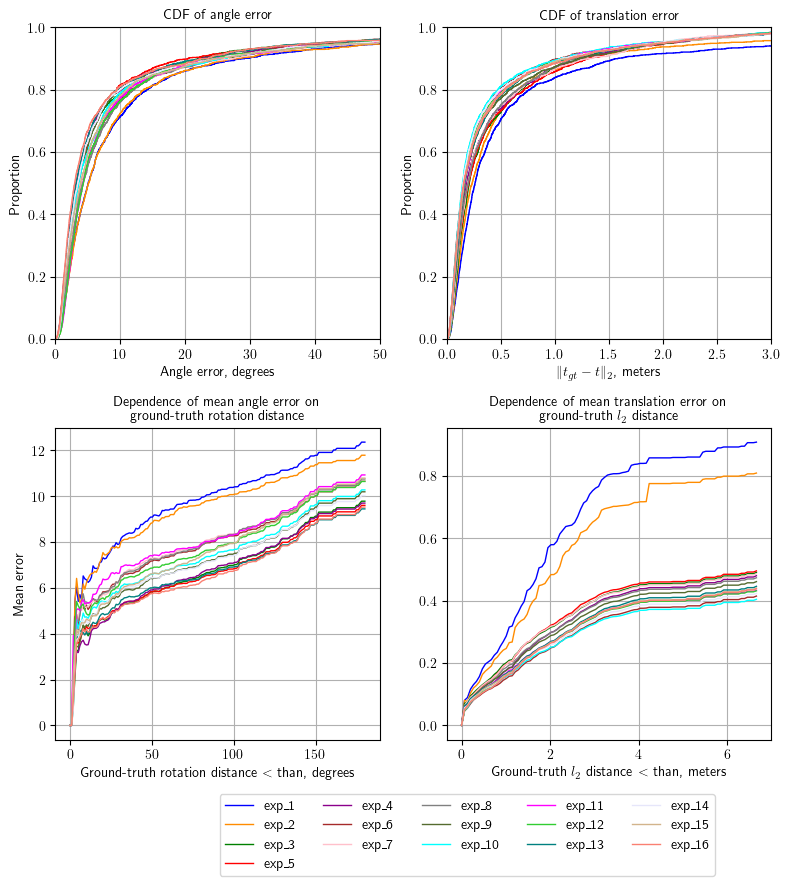

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

colors = ['b', 'darkorange' ,'g' ,'r' ,  '#8B008B',
          '#A52A2A','#FFC0CB','#808080','#556B2F','#00FFFF',
         '#FF00FF','#32CD32','#008080','#E6E6FA',
         '#D2B48C','#FA8072','#FFD700', '#000080']

exp_colors = {exp: col for  exp, col in zip(metrics.keys(), colors)}

for exp, m in metrics.items():
    sns.ecdfplot(x=m['R_angle_distances'], complementary=False, ax=ax[0,0], c=exp_colors[exp], linewidth=1)
    ax[0, 0].set_xlim([0., 50.])
    sns.ecdfplot(x=m['t_distances_l2'], complementary=False, ax=ax[0,1], c=exp_colors[exp], linewidth=1, log_scale=False)
    ax[0, 1].set_xlim([0., 3.])
    R_on_gt = calculate_metric_on_subset(
        m['R_angle_distances'], m['R_gt_distances'], np.mean, np.linspace(0, 180, 180), '<')
    R_on_gt[np.isnan(R_on_gt)] = 0
    ax[1, 0].plot(np.linspace(0, 180, 180), R_on_gt, label=exp, c=exp_colors[exp], linewidth=1)
    
    t_on_gt = calculate_metric_on_subset(
        m['t_distances_l2'], m['t_gt_distances'], np.mean, np.linspace(0, 6.66, 100), '<')
    t_on_gt[np.isnan(t_on_gt)] = 0
    ax[1, 1].plot(np.linspace(0, 6.66, 100), t_on_gt, c=exp_colors[exp], linewidth=1)
    
    
# ax[0, 0].vlines([5, 10, 20, 30], ymin=0, ymax=1)
ax[0, 0].set_xlabel('Angle error, degrees')
ax[0, 0].set_title('CDF of angle error')
ax[0, 0].grid()


# ax[0, 1].vlines([0.25, 0.5, 5], ymin=0, ymax=1)
ax[0, 1].set_xlabel('$\|t_{gt} - t\|_2$, meters')
ax[0, 1].set_title('CDF of translation error')
ax[0, 1].grid()

ax[1, 0].set_xlabel('Ground-truth rotation distance $<$ than, degrees')
ax[1, 0].set_ylabel('Mean error')
ax[1, 0].set_title('Dependence of mean angle error on \n ground-truth rotation distance')
ax[1, 0].grid()


ax[1, 1].set_xlabel('Ground-truth $l_2$ distance $<$ than, meters')
ax[1, 1].set_title('Mean error, meters')
ax[1, 1].set_title('Dependence of mean translation error on \n ground-truth $l_2$ distance')
ax[1, 1].grid()


handles, labels = ax[1, 0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(.9, 0), borderaxespad=0.0, ncol=5)
fig.tight_layout()
plt.savefig('/home/project/code/results/images/scannet_cdfs_gt_flow.pdf', bbox_inches='tight')